# Classification


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply the default theme
sns.set_theme()

In [2]:
# import track data
df = pd.read_csv("./data/playlist_tracks.csv")
playlist_data = pd.read_csv("./data/playlists.csv")

# merging the playlist info
df = df.merge(playlist_data, on="playlist_url")
df.head()

,preview_url,available_markets,explicit,type,episode,track,album,artists,disc_number,track_number,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name
0,https://p.scdn.co/mp3-preview/5f331286613eba71...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-5.894,0,0.0402,0.0459,0.852,0.0691,0.960,123.009,4,Lofi House
1,https://p.scdn.co/mp3-preview/b0eb532193111646...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-7.892,0,0.0707,0.0405,0.916,0.1020,0.646,117.018,4,Lofi House
2,https://p.scdn.co/mp3-preview/2ec7f3fa967937a1...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-7.570,0,0.0462,0.0237,0.731,0.5930,0.641,121.993,4,Lofi House
3,https://p.scdn.co/mp3-preview/2184855d4a8ff5fa...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-15.531,1,0.0282,0.3210,0.954,0.0822,0.171,132.986,4,Lofi House
4,https://p.scdn.co/mp3-preview/ddbaa2baf5d69d28...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-9.515,1,0.0472,0.1400,0.867,0.1460,0.418,126.027,4,Lofi House


## Data Preprocessing


In [3]:
# Selecting the relevant audio features
features = [
    "duration_ms",
    "popularity",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "time_signature",
]

df = df[features + ["playlist_name"]]
df

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name
0,381864,48,0.716,0.6450,11,-5.894,0,0.0402,0.0459,0.8520,0.0691,0.960,123.009,4,Lofi House
1,160301,46,0.817,0.4780,6,-7.892,0,0.0707,0.0405,0.9160,0.1020,0.646,117.018,4,Lofi House
2,367362,45,0.887,0.8230,5,-7.570,0,0.0462,0.0237,0.7310,0.5930,0.641,121.993,4,Lofi House
3,355488,43,0.481,0.3890,11,-15.531,1,0.0282,0.3210,0.9540,0.0822,0.171,132.986,4,Lofi House
4,333772,41,0.615,0.6480,2,-9.515,1,0.0472,0.1400,0.8670,0.1460,0.418,126.027,4,Lofi House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,158607,33,0.708,0.1880,0,-19.226,1,0.0504,0.9070,0.9020,0.1060,0.469,76.522,4,Summer Jazz
431,193962,28,0.571,0.4220,9,-12.911,0,0.0268,0.9230,0.9480,0.1150,0.516,83.204,4,Summer Jazz
432,217798,41,0.584,0.1390,5,-11.483,1,0.0304,0.9610,0.0369,0.1060,0.240,106.759,4,Summer Jazz
433,290709,48,0.449,0.1420,10,-18.201,1,0.0421,0.9450,0.9140,0.1110,0.131,112.211,4,Summer Jazz


In [4]:
# extracting independent variables
X = df[features]

# extracting dependent variable
y = df[["playlist_name"]]

In [5]:
# splitting the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape

(348, 14)

`Ideally, we would create a validation set to perform model tuning and properly analyze model generalization. However, I omitted this step to keep things simple and because I am working with a small dataset.`

Note: for simple model tuning with GridSearch, we will use cross-validation anyway.


In [6]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)
X_train_scaled.head()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.027248,-0.547331,0.649291,-0.842869,-0.356827,-1.018292,-1.115868,-0.656430,1.073071,1.103319,-0.526019,-0.582283,-0.142625,0.342218
1,0.655229,0.083667,-1.256148,-1.280538,-0.061170,-1.765584,-1.115868,-0.725612,1.181932,1.231299,-0.596085,-1.110202,-0.657884,0.342218
2,-0.252851,2.247088,2.096013,0.230319,1.712771,0.064449,0.896163,1.426206,-0.893006,-0.565248,-0.677558,2.014509,-0.457548,0.342218
3,0.261709,-0.457188,-0.538668,1.129638,-1.243798,1.199916,-1.115868,-0.521643,-0.958712,-1.014331,1.633000,-0.720208,-0.433831,0.342218
4,1.142552,-1.268471,1.807845,-0.282293,-0.061170,-0.465903,-1.115868,0.579315,0.041159,1.178176,-0.550461,0.925378,0.173675,0.342218


In [7]:
# encode the playlist names
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.squeeze())
y_test_encoded = label_encoder.transform(y_test.squeeze())
y_train_encoded[:5]

array([0, 0, 2, 3, 1])

## Feature Selection


<Axes: >

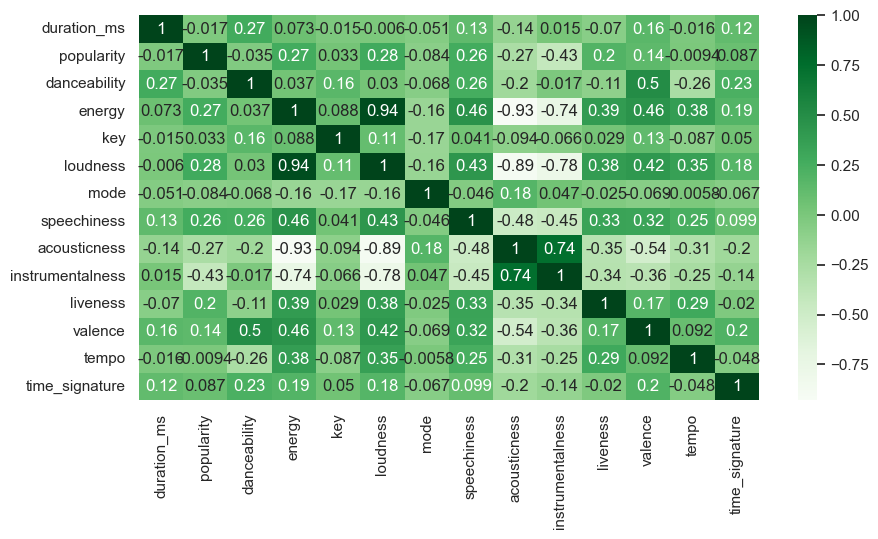

In [8]:
# checking if the audio features are correlated (as well as the popularity)
plt.figure(figsize=(10, 5))
sns.heatmap(X_train_scaled.corr(), annot=True, cmap="Greens")

Given the correlation between:

- energy and loudness
- energy and acousticness

I will drop the loudness and acousticness features since it does not seem they bring additional useful information. Energy, which seems most interpretable as well, will convey the main information


In [9]:
# dropping loudness and acousticness
X_train_scaled.drop(columns=["loudness", "acousticness"], inplace=True)
X_test_scaled.drop(columns=["loudness", "acousticness"], inplace=True)

<Axes: xlabel='importance', ylabel='feature'>

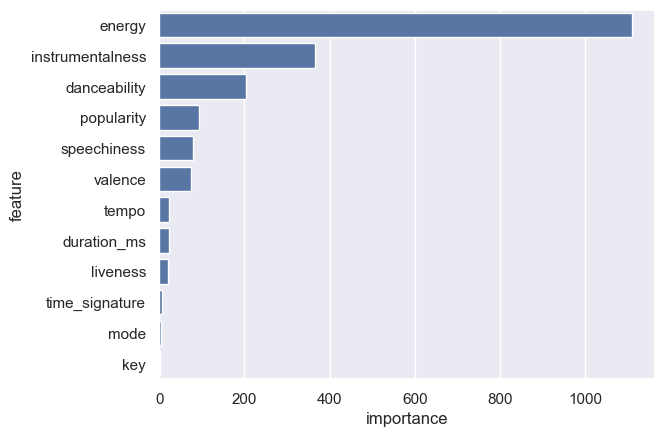

In [10]:
# Anova Feature Selection
from sklearn.feature_selection import (
    SelectKBest,
    f_classif,
)  # f_classif for anova f-test

# SelectKBest to extract best features
kbest = SelectKBest(score_func=f_classif, k="all")
fit = kbest.fit(X_train_scaled, y_train_encoded)

dfcolumns = pd.DataFrame(X_train_scaled.columns)
dfscores = pd.DataFrame(fit.scores_)

# creating dataframe
feature_importance_df = pd.DataFrame(
    {"feature": X_train_scaled.columns, "importance": fit.scores_}
).sort_values(by="importance", ascending=False)

# plotting the feature importances with sns bar
sns.barplot(x="importance", y="feature", data=feature_importance_df)

- It's interesting to see that Key, Time signature and mode seem to be the less important features here!
- Energy and instrumentalness are important features


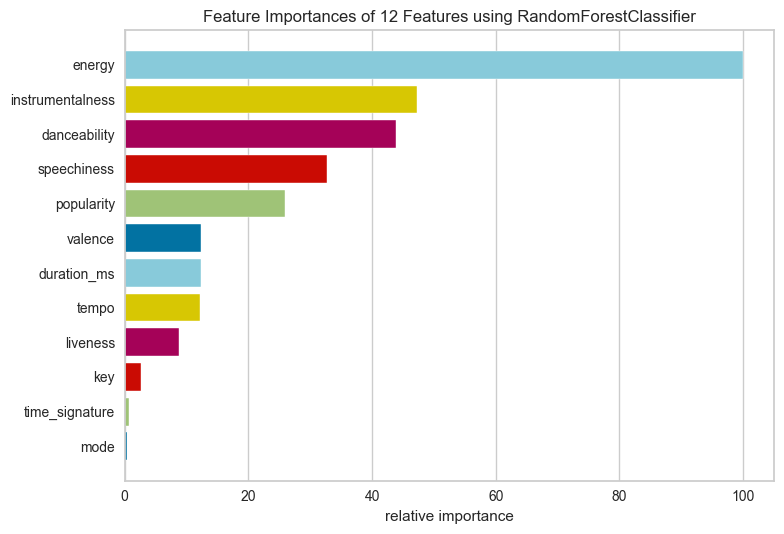

<Axes: title={'center': 'Feature Importances of 12 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [11]:
# feature importance with tree models
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

model = RandomForestClassifier()
viz = FeatureImportances(model)
viz.fit(X_train_scaled, y_train_encoded)
viz.show()

- We confirm here that time signature, mode and key are the least important features. We will therefore remove
- Again, energy and instrumentalness are important here!


In [12]:
# dropping the least important features
X_train_scaled.drop(columns=["time_signature", "key", "mode"], inplace=True)
X_test_scaled.drop(columns=["time_signature", "key", "mode"], inplace=True)

## Modeling - Ensemble model


Text(70.72222222222221, 0.5, 'Actual')

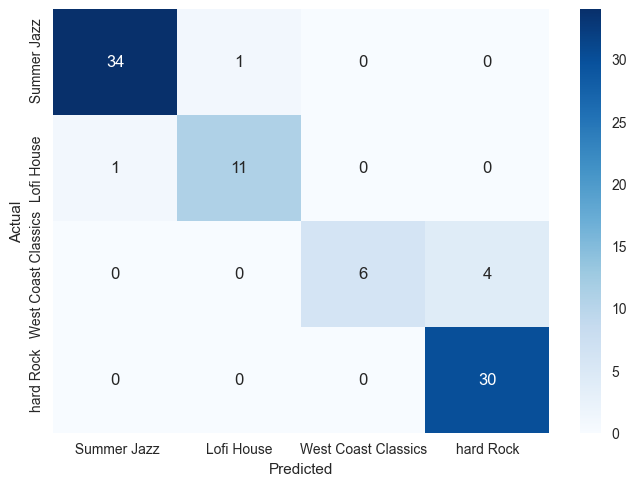

In [13]:
# let's start with a simple Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, max_depth=3)
rf_model.fit(X_train_scaled, y_train_encoded)

# making predictions
y_pred = rf_model.predict(X_test_scaled)

# plotting confusion matrix on test set
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [14]:
# printing a little classification report
from sklearn.metrics import classification_report

print(
    classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)
)

                     precision    recall  f1-score   support

        Summer Jazz       0.97      0.97      0.97        35
         Lofi House       0.92      0.92      0.92        12
West Coast Classics       1.00      0.60      0.75        10
          hard Rock       0.88      1.00      0.94        30

           accuracy                           0.93        87
          macro avg       0.94      0.87      0.89        87
       weighted avg       0.94      0.93      0.93        87



In [15]:
# a little model fine-tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    "n_estimators": [5, 20, 100],
    "max_depth": [None, 3, 10, 20],
    "min_samples_split": [2, 5, 10],
    "bootstrap": [True, False],
}

# stratified cross-validation for the grid search
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=cv_strategy,
    n_jobs=-1,
    scoring="f1_micro",
)
grid_search.fit(X_train_scaled, y_train_encoded)

results_df = pd.DataFrame(grid_search.cv_results_)
print(f"Best parameters: {grid_search.best_params_}")
results_df[
    ["params", "mean_test_score", "std_test_score", "rank_test_score"]
].sort_values(by="rank_test_score").head(5)

Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 20}


,params,mean_test_score,std_test_score,rank_test_score
28,"{'bootstrap': True, 'max_depth': 20, 'min_samp...",0.979876,0.007068,1
7,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.979876,0.007068,1
56,"{'bootstrap': False, 'max_depth': 10, 'min_sam...",0.979834,0.014748,3
38,"{'bootstrap': False, 'max_depth': None, 'min_s...",0.976936,0.019654,4
29,"{'bootstrap': True, 'max_depth': 20, 'min_samp...",0.974120,0.010847,5


In [16]:
# evaluating the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print(
    classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)
)

                     precision    recall  f1-score   support

        Summer Jazz       0.97      0.94      0.96        35
         Lofi House       0.85      0.92      0.88        12
West Coast Classics       1.00      0.60      0.75        10
          hard Rock       0.88      1.00      0.94        30

           accuracy                           0.92        87
          macro avg       0.92      0.86      0.88        87
       weighted avg       0.93      0.92      0.92        87



## Modeling - Deep Learning


In [17]:
# importing DL libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [18]:
# Convert to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

In [19]:
# creating clean torch datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# creating dataloaders for batch processing
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [20]:
# sanity check
X, y = next(iter(train_loader))
print("nb features:", X_train_scaled.shape[1])
print(X.shape, y.shape)

nb features: 9
torch.Size([8, 9]) torch.Size([8])


In [21]:
# NN model class
class NeuralNet(nn.Module):
    def __init__(
        self, input_size, hidden_sizes, output_size, activation=F.relu, dropout=0.1
    ):
        super(NeuralNet, self).__init__()

        # I want my model to be flexible, so I will allow for multiple hidden layers
        layers = []

        # Input layer to first hidden layer, hidden_sizes len should be at least 1
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.Dropout(dropout))

        # Adding hidden layers
        for i in range(1, len(hidden_sizes)):
            layers.append(nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]))
            layers.append(nn.Dropout(dropout))

        # Output layer
        layers.append(nn.Linear(hidden_sizes[-1], output_size))

        # Store the layers in a ModuleList
        self.layers = nn.ModuleList(layers)

        # store the activation function
        self.activation = activation

    # forward pass
    def forward(self, x):
        # Pass input through each layer in the network
        for i in range(len(self.layers) - 1):
            x = self.layers[i](x)

            # we add the activation if layer is not dropout
            if isinstance(self.layers[i], nn.Linear):
                x = self.activation(x)

        # no activation for the last layer
        x = self.layers[-1](x)

        return x

In [22]:
# initializing the model
input_size = X_train_scaled.shape[1]
output_size = len(label_encoder.classes_)
hidden_sizes = [8, 8]

model = NeuralNet(input_size, hidden_sizes, output_size)
model

NeuralNet(
  (layers): ModuleList(
    (0): Linear(in_features=9, out_features=8, bias=True)
    (1): Dropout(p=0.1, inplace=False)
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [23]:
# sanity check for the model
X_sample, y_sample = next(iter(train_loader))
y_pred = model(X_sample)

print("Input shape:", X_sample.shape)
print("Output shape:", y_pred.shape)

y_pred

Input shape: torch.Size([8, 9])
Output shape: torch.Size([8, 4])


tensor([[ 0.0297,  0.1327,  0.1945,  0.3887],
        [-0.1268,  0.0931,  0.1412,  0.2807],
        [-0.1791, -0.0338,  0.1599,  0.1327],
        [-0.0346,  0.0018,  0.1667,  0.2107],
        [-0.3426, -0.0469,  0.2605,  0.1731],
        [-0.1316, -0.0635,  0.2386,  0.1541],
        [-0.1341,  0.0179,  0.1991,  0.2237],
        [-0.2191, -0.0394,  0.1996,  0.1391]], grad_fn=<AddmmBackward0>)

In [24]:
# little training function
def train_model(model, train_loader, eval_loader, optimizer, device="cpu", epochs=5):
    # move model to device
    model.to(device)

    # history
    history = {"train_loss": [], "train_acc": [], "valid_loss": [], "valid_acc": []}

    # setup loss function for multi-class classification
    criterion = nn.CrossEntropyLoss()

    # training loop
    print("Training Start")
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        train_acc = 0
        valid_loss = 0
        valid_acc = 0
        for x, y in train_loader:
            # move data to device
            x = x.to(device)
            y = y.to(device)

            # forward pass
            outputs = model(x)
            cur_train_loss = criterion(outputs, y)
            cur_train_acc = (outputs.argmax(dim=1) == y).float().mean().item()

            # backpropagation
            optimizer.zero_grad()
            cur_train_loss.backward()

            # update weights
            optimizer.step()

            # loss and acc
            train_loss += cur_train_loss
            train_acc += cur_train_acc

        # valid start
        model.eval()
        with torch.no_grad():
            for x, y in eval_loader:
                x = x.to(device)
                y = y.to(device)

                # predict
                outputs = model(x)
                cur_valid_loss = criterion(outputs, y)
                cur_valid_acc = (outputs.argmax(dim=1) == y).float().mean().item()

                # loss and acc
                valid_loss += cur_valid_loss
                valid_acc += cur_valid_acc

        # epoch output
        train_loss = (train_loss / len(train_loader)).item()
        train_acc = train_acc / len(train_loader)
        val_loss = (valid_loss / len(eval_loader)).item()
        val_acc = valid_acc / len(eval_loader)
        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)
        history["valid_loss"].append(val_loss)
        history["valid_acc"].append(val_acc)
        print(
            f"Epoch:{epoch + 1} / {epochs}, train loss:{train_loss:.4f} train_acc:{train_acc:.4f}, valid loss:{val_loss:.4f} valid acc:{val_acc:.5f}"
        )

    return history

In [25]:
# initializing the model
input_size = X_train_scaled.shape[1]
output_size = len(label_encoder.classes_)
hidden_sizes = [8, 8]

model = NeuralNet(input_size, hidden_sizes, output_size)

In [26]:
# training the model
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
history = train_model(model, train_loader, test_loader, optimizer, epochs=10)

Training Start
Epoch:1 / 10, train loss:0.9768 train_acc:0.5909, valid loss:0.5124 valid acc:0.74713
Epoch:2 / 10, train loss:0.4182 train_acc:0.8438, valid loss:0.2381 valid acc:0.93103
Epoch:3 / 10, train loss:0.2311 train_acc:0.9176, valid loss:0.1953 valid acc:0.95402
Epoch:4 / 10, train loss:0.2004 train_acc:0.9176, valid loss:0.1432 valid acc:0.95402
Epoch:5 / 10, train loss:0.1423 train_acc:0.9545, valid loss:0.1909 valid acc:0.93103
Epoch:6 / 10, train loss:0.1469 train_acc:0.9517, valid loss:0.1598 valid acc:0.95402
Epoch:7 / 10, train loss:0.1735 train_acc:0.9290, valid loss:0.1733 valid acc:0.94253
Epoch:8 / 10, train loss:0.1215 train_acc:0.9631, valid loss:0.1804 valid acc:0.93103
Epoch:9 / 10, train loss:0.1159 train_acc:0.9574, valid loss:0.1988 valid acc:0.95402
Epoch:10 / 10, train loss:0.1198 train_acc:0.9631, valid loss:0.1779 valid acc:0.94253


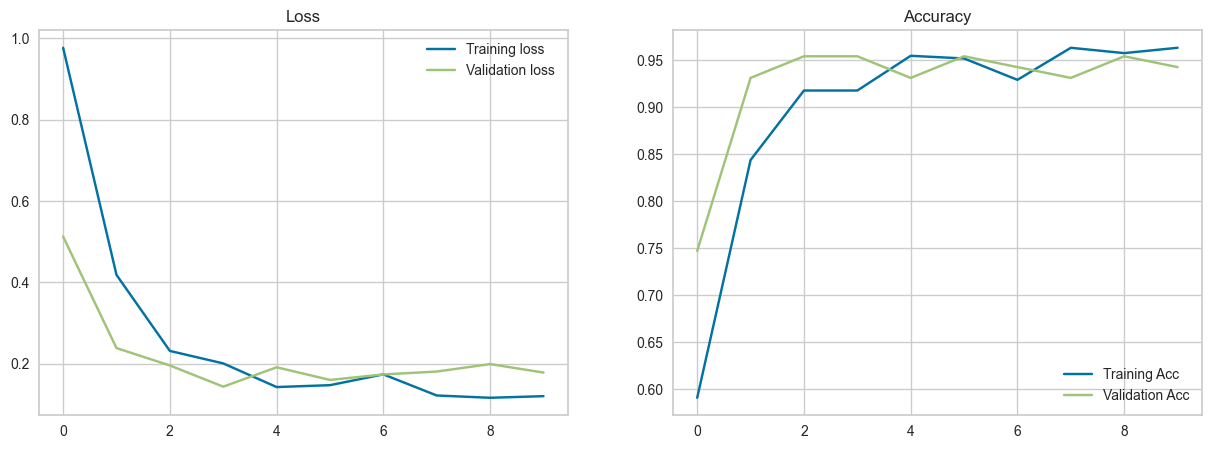

In [27]:
# plotting training history
train_loss_hist = history["train_loss"]
val_loss_hist = history["valid_loss"]
train_acc_hist = history["train_acc"]
val_acc_hist = history["valid_acc"]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(train_loss_hist, ax=axes[0], label="Training loss")
sns.lineplot(val_loss_hist, ax=axes[0], label="Validation loss")
axes[0].set_title("Loss")
axes[0].legend()

sns.lineplot(train_acc_hist, ax=axes[1], label="Training Acc")
sns.lineplot(val_acc_hist, ax=axes[1], label="Validation Acc")
axes[1].set_title("Accuracy")
axes[1].legend()
plt.show()

In [28]:
# evaluation on the test set
model.eval()
with torch.no_grad():
    y_pred = model(test_loader.dataset.tensors[0])

# converting logits to class
y_pred_class = y_pred.argmax(dim=1).numpy()

Text(70.72222222222221, 0.5, 'Actual')

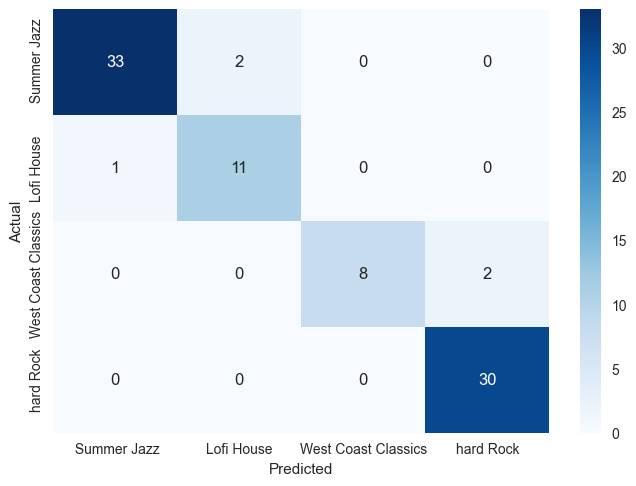

In [29]:
# plotting confusion matrix on test set
conf_matrix = confusion_matrix(y_test_encoded, y_pred_class)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [30]:
# printing a little classification report
print(
    classification_report(
        y_test_encoded, y_pred_class, target_names=label_encoder.classes_
    )
)

                     precision    recall  f1-score   support

        Summer Jazz       0.97      0.94      0.96        35
         Lofi House       0.85      0.92      0.88        12
West Coast Classics       1.00      0.80      0.89        10
          hard Rock       0.94      1.00      0.97        30

           accuracy                           0.94        87
          macro avg       0.94      0.91      0.92        87
       weighted avg       0.95      0.94      0.94        87



### Saving Model


In [31]:
# saving the model
model_path = "models/neural_net_model.pth"
torch.save(model.state_dict(), model_path)

In [32]:
# saving the label encoder
import pickle

# Save the label encoder and scaler
with open("models/preprocessing.pkl", "wb") as f:
    pickle.dump({"label_encoder": label_encoder, "scaler": scaler}, f)

### Testing Python script


In [33]:
import scripts.modeling as modeling

In [35]:
# input dataframe
# import track data
df = pd.read_csv("./data/playlist_tracks.csv")
playlist_data = pd.read_csv("./data/playlists.csv")

# merging the playlist info
df = df.merge(playlist_data, on="playlist_url")
df.head()

,preview_url,available_markets,explicit,type,episode,track,album,artists,disc_number,track_number,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name
0,https://p.scdn.co/mp3-preview/5f331286613eba71...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-5.894,0,0.0402,0.0459,0.852,0.0691,0.960,123.009,4,Lofi House
1,https://p.scdn.co/mp3-preview/b0eb532193111646...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-7.892,0,0.0707,0.0405,0.916,0.1020,0.646,117.018,4,Lofi House
2,https://p.scdn.co/mp3-preview/2ec7f3fa967937a1...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-7.570,0,0.0462,0.0237,0.731,0.5930,0.641,121.993,4,Lofi House
3,https://p.scdn.co/mp3-preview/2184855d4a8ff5fa...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-15.531,1,0.0282,0.3210,0.954,0.0822,0.171,132.986,4,Lofi House
4,https://p.scdn.co/mp3-preview/ddbaa2baf5d69d28...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-9.515,1,0.0472,0.1400,0.867,0.1460,0.418,126.027,4,Lofi House


In [36]:
# build and train model
model, label_encoder, scaler, history, class_report = modeling.build_train(
    df, epochs=20, hidden_sizes=[8, 16, 8], lr=0.01
)

Training Start
Epoch:1 / 20, train loss:1.0030 train_acc:0.6136, valid loss:0.5382 valid acc:0.74713
Epoch:2 / 20, train loss:0.5777 train_acc:0.7699, valid loss:0.3318 valid acc:0.86207
Epoch:3 / 20, train loss:0.4227 train_acc:0.8352, valid loss:0.2096 valid acc:0.91954
Epoch:4 / 20, train loss:0.3593 train_acc:0.8636, valid loss:0.1320 valid acc:0.97701
Epoch:5 / 20, train loss:0.2647 train_acc:0.9006, valid loss:0.1119 valid acc:0.97701
Epoch:6 / 20, train loss:0.3376 train_acc:0.8892, valid loss:0.1164 valid acc:0.98851
Epoch:7 / 20, train loss:0.2261 train_acc:0.9261, valid loss:0.0881 valid acc:0.97701
Epoch:8 / 20, train loss:0.2802 train_acc:0.9062, valid loss:0.0784 valid acc:0.97701
Epoch:9 / 20, train loss:0.1782 train_acc:0.9233, valid loss:0.0882 valid acc:0.96552
Epoch:10 / 20, train loss:0.2265 train_acc:0.9119, valid loss:0.1092 valid acc:0.97701
Epoch:11 / 20, train loss:0.1626 train_acc:0.9517, valid loss:0.0639 valid acc:0.96552
Epoch:12 / 20, train loss:0.2370 trai

In [37]:
# class report
class_report

,precision,recall,f1-score,support
Summer Jazz,0.972222,1.000000,0.985915,35.000000
Lofi House,1.000000,0.916667,0.956522,12.000000
West Coast Classics,1.000000,0.900000,0.947368,10.000000
hard Rock,0.967742,1.000000,0.983607,30.000000
accuracy,0.977011,0.977011,0.977011,0.977011
macro avg,0.984991,0.954167,0.968353,87.000000
weighted avg,0.977702,0.977011,0.976634,87.000000


In [38]:
class_report.loc[["weighted avg"], "f1-score"].values[0]

np.float64(0.9766342994818866)

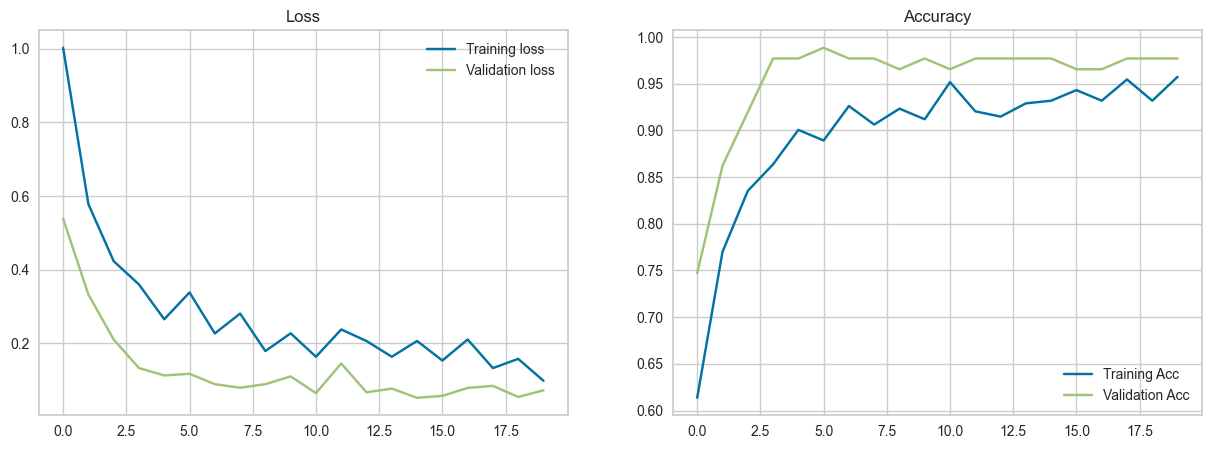

In [39]:
# plot training history
fig = modeling.plot_training_history(history)